# 单变量线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'C:\\Users\\tanling\\Desktop\\ex1\\ex1data1.txt'
data = pd.read_csv(path,header = None,names = ['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


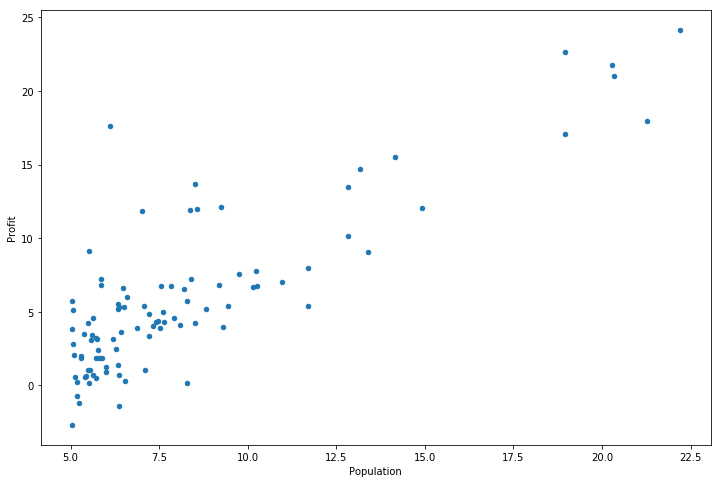

In [3]:
data.plot(kind = 'scatter',x = 'Population',y = 'Profit',figsize = (12,8))
plt.show()

In [4]:
#创建代价函数
def computeCost(X,y,theta):
    inner = np.power(((X*theta.T) - y),2)
    return np.sum(inner)/(2*len(X))

In [5]:
data.insert(0,'Ones',1)

In [6]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列

In [8]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [9]:
computeCost(X, y, theta)

32.072733877455676

### batch gradient decent（批量梯度下降）

In [10]:
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X*theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)))*np.sum(term)
            
        theta = temp
        cost[i] = computeCost(X,y,theta)
        
    return theta,cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [11]:
alpha = 0.01
iters = 1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [12]:
g,cost = gradientDescent(X,y,theta,alpha,iters)

In [13]:
g

matrix([[-3.24140214,  1.1272942 ]])

 最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [14]:
computeCost(X,y,g)

4.515955503078912

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

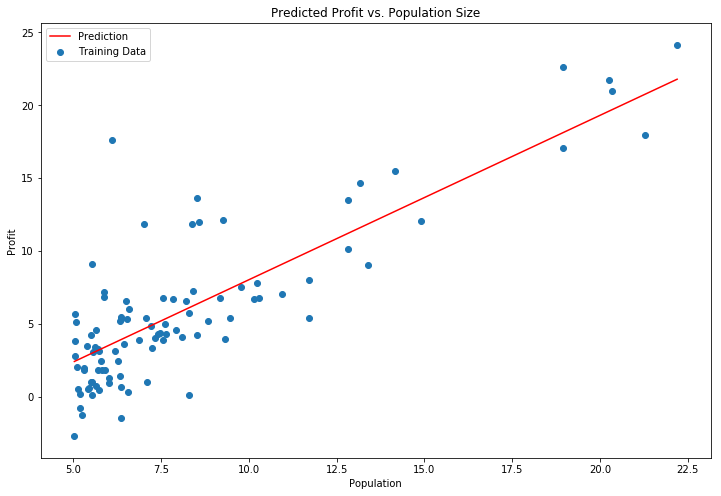

In [15]:
x = np.linspace(data.Population.min(),data.Population.max(),100)
f = g[0,0] + (g[0,1] * x)

fig,ax = plt.subplots(figsize = (12,8))
ax.plot(x,f,'r',label = 'Prediction')
ax.scatter(data.Population,data.Profit,label = 'Training Data')
ax.legend(loc = 2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

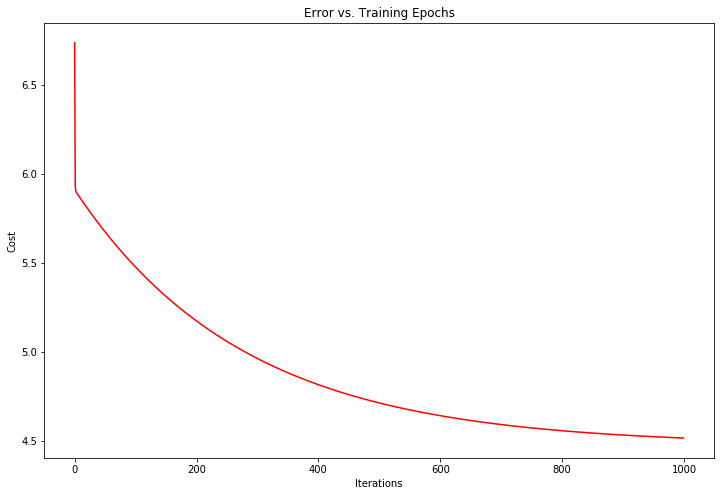

In [18]:
fig,ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epochs')
plt.show()

## 多变量线性回归

In [21]:
path = 'C:\\Users\\tanling\\Desktop\\ex1\\ex1data2.txt'
data2 = pd.read_csv(path,header = None,names = ['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [22]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [23]:
#add one column
data2.insert(0,'Ones',1)

#set X(training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols - 1]
y2 = data2.iloc[:,cols-1:cols]

#convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

#perform linear regression on the data set
g2,cost2 = gradientDescent(X2,y2,theta2,alpha,iters)

#get the cost (error) of the model
computeCost(X2,y2,g2)

0.13070336960771892

我们也可以快速查看这一个的训练进程。

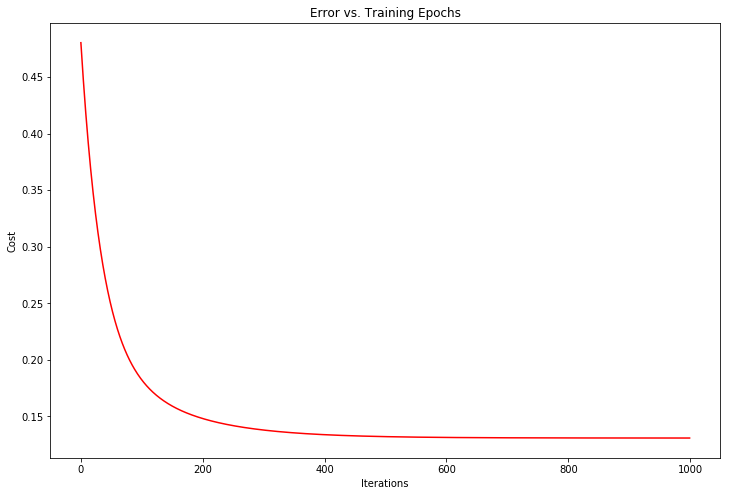

In [25]:
fig,ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(iters),cost2,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epochs')
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。



In [26]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

scikit-learn model的预测表现

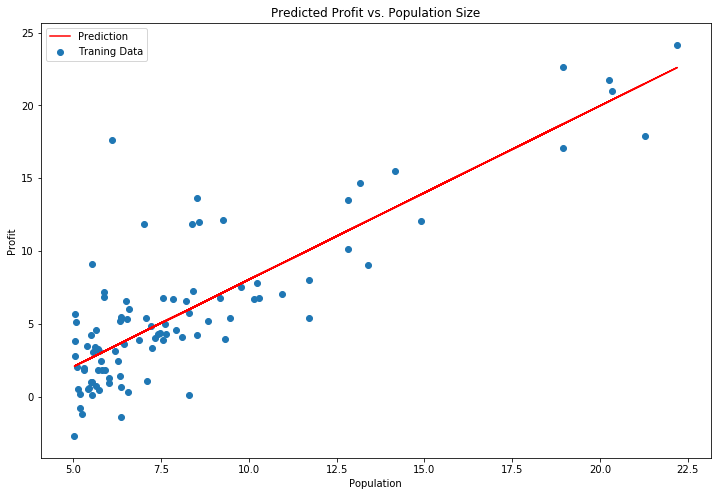

In [27]:
x = np.array(X[:,1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()